Highly multiplexed immunofluorescence imaging of human tissues and tumors using t-CyCIF and conventional optical microscopes

ShortName: lin2018highly

Steps of processing the data from raw to Anndata:

In [1]:
# 1, Download the raw data from https://lincs.hms.harvard.edu/lin-elife-2018/

In [2]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad

In [1]:
path = '/home/yzy/projects/SODB/SODB_code/SODB/revision/Raw2Anndata/SpatialProteomics/t-CyCIF/data/rawdata_Figure1112_GBM'


In [3]:
raw_pd = pd.read_csv(f'{path}/GBM0801-all.csv')

In [4]:
raw_pd

,HOECHST1,HOECHST2,HOECHST3,HOECHST4,HOECHST5,HOECHST6,HOECHST7,HOECHST8,HOECHST9,HOECHST10,...,BCL2,Area,Circ,X,Y,frame,COL,ROW,Xt,Yt
0,7830.277,5991.548,7289.781,6663.026,4487.594,3109.806,6792.303,1892.374,867.497,199.690,...,302.948,261.951,0.967,1525.266,249.193,19,2,2,3189.266,2558.807
1,11517.507,9237.792,11153.326,9663.472,6791.757,4607.465,9924.271,2628.722,950.382,223.632,...,311.792,243.360,0.958,1540.086,252.778,19,2,2,3204.086,2555.222
2,9205.522,7197.553,9282.381,8105.376,5862.708,4799.221,9279.363,2590.385,247.757,230.093,...,228.633,381.941,0.846,1278.154,292.489,19,2,2,2942.154,2515.511
3,4007.503,3087.238,6039.930,4464.816,4418.346,5753.297,5881.870,1945.843,201.708,175.351,...,279.000,312.651,0.824,948.976,418.182,19,2,2,2612.976,2389.818
4,5720.040,4499.634,8206.612,5285.850,9790.449,7366.185,6450.419,2267.520,201.784,171.463,...,280.921,383.631,0.893,785.765,466.079,19,2,2,2449.765,2341.921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349059,18973.623,18617.072,25516.014,18917.986,15302.572,13718.667,27413.116,22465.022,11661.841,24065.435,...,230.754,233.220,0.871,652.601,1397.172,219,15,13,23948.601,16854.828
349060,11805.475,11152.851,17510.525,11481.426,9634.792,8901.535,19014.931,13975.436,7378.485,14218.594,...,266.891,170.690,0.946,675.750,1397.147,219,15,13,23971.750,16854.853
349061,7963.980,7778.878,12236.612,7897.133,6724.592,6065.102,13797.816,9738.816,5294.214,10143.969,...,383.214,165.620,0.840,829.029,1398.231,219,15,13,24125.029,16853.769
349062,9347.602,10102.774,14239.172,9113.624,7185.011,6122.129,13377.495,9059.957,4514.796,7901.473,...,295.527,157.170,0.871,1082.097,1398.095,219,15,13,24378.097,16853.905


In [5]:
var_list = []
obs_list = []
obs_keyword_list = ['Area','Circ','X','Y','frame','COL','ROW','Xt','Yt']
for var in raw_pd.columns:
    if 'HOECHST' in var:
        obs_list.append(var)
    elif var in obs_keyword_list:
        obs_list.append(var)
    else:
        var_list.append(var)



In [6]:
var_list

['Alexa488',
 'cJUN',
 'Ki67',
 'pERK',
 'PD1',
 'EpCAM',
 'pS6',
 'Ecadherin',
 'EGFR',
 'Bax',
 'Alexa555',
 'Axl',
 'CD4_1',
 'pRB',
 'CD4_2',
 'FOXP3',
 'CD45R',
 'Keratin',
 'VEGFR2',
 'MAP2',
 'Alexa647',
 'MITF',
 'NGFR',
 'CD45_1',
 'PDL1',
 'CD3',
 'CD45_2',
 'Vimentin',
 'gH2ax',
 'BCL2']

In [7]:
obs_list

['HOECHST1',
 'HOECHST2',
 'HOECHST3',
 'HOECHST4',
 'HOECHST5',
 'HOECHST6',
 'HOECHST7',
 'HOECHST8',
 'HOECHST9',
 'HOECHST10',
 'Area',
 'Circ',
 'X',
 'Y',
 'frame',
 'COL',
 'ROW',
 'Xt',
 'Yt']

In [8]:
X = np.array(raw_pd.loc[:,var_list].values).astype('float')

In [9]:
raw_pd[['X']].values

array([[1525.266],
       [1540.086],
       [1278.154],
       ...,
       [ 829.029],
       [1082.097],
       [1189.751]])

In [10]:
adata = ad.AnnData(X)
adata.var_names = var_list
for obs in obs_list:
    adata.obs[obs] = raw_pd[[obs]].values

/tmp/ipykernel_1061208/848963088.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


In [12]:
adata.obsm['spatial'] = np.vstack([adata.obs['X'],adata.obs['Y']]).transpose()

In [14]:
adata.obsm['spatial'] = np.vstack([adata.obs['Xt'],adata.obs['Yt']]).transpose()

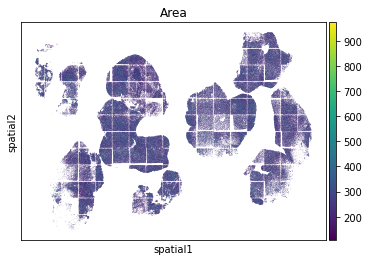

In [16]:
sc.pl.embedding(adata,basis='spatial',color=['Area'])

In [17]:
# adata.obsm['spatial'] = np.vstack([adata.obs['X'],adata.obs['Y']]).transpose()
adata.write_h5ad(f'Figure1112_GBM.h5ad')
